## The Convolutional Neural Network

We will use a convolutional neural network to detect the emotions. 
We will train our model using the FER2013 dataset. Then, using the trained model, we will detect the emotions in the faces detected in the video stream captured by the camera or the video file.


In [17]:
import tensorflow  as  tf
from  tensorflow  import  keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.model_selection import train_test_split
import sklearn

import numpy as  np
import matplotlib.pyplot  as  plt
import os
import cv2
import random
import cv2 as cv
import pandas  as  pd
import tqdm as tqdm


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

#print the number of GPU

print ( "Num GPUs Available: " ,  len ( tf.config.experimental.list_physical_devices ( 'GPU' )))

Num GPUs Available:  1


2022-12-19 14:48:55.700970: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:48:55.701187: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:48:55.701269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:48:55.701849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:48:55.701973: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

# Load the dataset

Load and differentiate between training and testing data (they are spit in two folders, one for training and one for testing).

In [18]:
datasetToUse = "GoogleFer" # "CK+48" or "FER2013" or "GoogleFer" or "datasetGigante"

### FER2013 dataset

In [ ]:
#load the data
if datasetToUse == "FER2013":
        
        path = "./dataset/FER2013/"
        test_path = path + "test/"
        train_path = path + "train/"


        train_x = []
        train_y = []
        val_x = []
        val_y = []

        #load the train data

        classes = { "angry" : 0,  "disgust" : 1,  "fear" : 2,  "happy" : 3,  "sad" : 4,  "surprise" : 5,  "neutral" : 6}
        classesDiz2 = { 0 : "angry" ,  1 : "disgust" ,  2 : "fear" ,  3 : "happy" ,  4 : "sad" ,  5 : "surprise" ,  6 : "neutral" }

        data_generator = ImageDataGenerator(rescale=1./255)




        batch_size = 32
        # Preprocess all test images
        train_generator = data_generator.flow_from_directory(
                train_path,
                target_size=(48, 48),
                batch_size=64,
                color_mode="grayscale",
                class_mode='categorical')

        # Preprocess all train images
        validation_generator = data_generator.flow_from_directory(
                test_path,
                target_size=(48, 48),
                batch_size=64,
                color_mode="grayscale",
                class_mode='categorical')

                




                



train_x shape:  (32645, 48, 48)
train_y shape:  (32645, 8)
val_x shape:  (8166, 48, 48)
val_y shape:  (8166, 8)


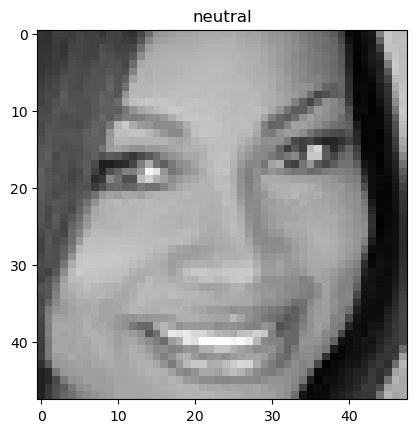

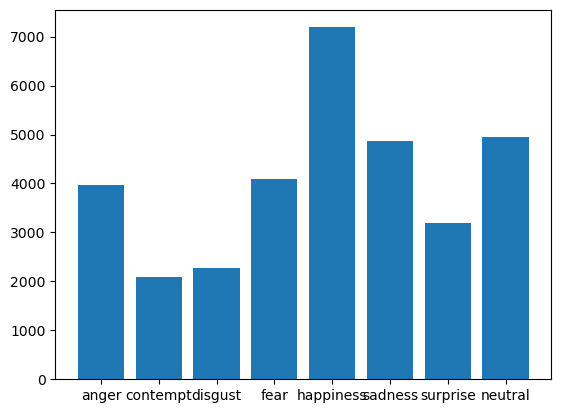

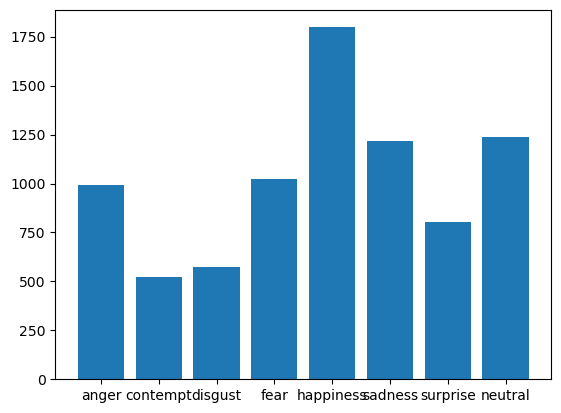

In [19]:
if datasetToUse == "GoogleFer":


        path = "./dataset/GoogleFer/"
        test_path = path + "val/"
        train_path = path + "train/"

        classes = { "anger" : 0,  "contempt" : 1,  "disgust" : 2,  "fear" : 3,  "happiness" : 4,  "sadness" : 5,  "surprise" : 6,  "neutral" : 7}

        classesReversed = { 0 : "anger" ,  1 : "contempt" ,  2 : "disgust" ,  3 : "fear" ,  4 : "happiness" ,  5 : "sadness" ,  6 : "surprise" ,  7 : "neutral" }
        num_classes = 8

        batch_size = 32
        


        train_x = []
        train_y = []
        val_x = []
        val_y = []

        #load the train data

        

        contClassesTrain = { "anger" : 0,  "contempt" : 0,  "disgust" : 0,  "fear" : 0,  "happiness" : 0,  "sadness" : 0,  "surprise" : 0,  "neutral" : 0}
        contClassesTest = { "anger" : 0,  "contempt" : 0,  "disgust" : 0,  "fear" : 0,  "happiness" : 0,  "sadness" : 0,  "surprise" : 0,  "neutral" : 0}



        for i in classes:
                #convert i to upper case
                #i = i.upper()    
                path = os.path.join(train_path, i.upper())
                 
                for img in os.listdir(path):
                        img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                        #new_array = cv2.resize(img_array, (48, 48))
                        train_x.append(img_array)
                        train_y.append(classes[i])
                        contClassesTrain[i] = contClassesTrain[i] + 1

        #load the test data
        for i in classes:
                #i = i.upper()  
                path = os.path.join(test_path, i.upper())
               
                 
                for img in os.listdir(path):
                        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                        #new_array = cv2.resize(img_array, (48, 48))
                        val_x.append(img_array)
                        val_y.append(classes[i])
                        contClassesTest[i] = contClassesTest[i] + 1

        #convert the val_x and train_x to numpy array
        train_x = np.array(train_x)
        train_y = keras.utils.to_categorical(train_y, 8)
        val_x = np.array(val_x)
        val_y = keras.utils.to_categorical(val_y, 8)

        print ( "train_x shape: " , train_x.shape)
        print ( "train_y shape: " , train_y.shape)
        print ( "val_x shape: " , val_x.shape)
        print ( "val_y shape: " , val_y.shape)


        data_generator = ImageDataGenerator(
                                        rescale=1./255,
                                        rotation_range=30,
                                        width_shift_range=0.3,
                                        height_shift_range=0.3,        
                                        zoom_range=0.3
                                        )
        

        #reshape the data
        train_x = train_x.reshape(train_x.shape[0], 48, 48, 1)
        val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)

        train_generator = data_generator.flow(train_x, train_y, batch_size=batch_size)
        validation_generator = data_generator.flow(val_x, val_y, batch_size=batch_size)

        


        randomIndex = random.randint(0, len(train_x))
        #plot the first image
        plt.imshow(train_x[randomIndex].reshape(48, 48), cmap='gray')
        #label it
        plt.title(classesReversed[np.argmax(train_y[randomIndex])])
        plt.show()



        #plot the contClassesTrain
        plt.bar(range(len(contClassesTrain)), list(contClassesTrain.values()), align='center')
        plt.xticks(range(len(contClassesTrain)), list(contClassesTrain.keys()))
        plt.show()

        #plot the contClassesTest
        plt.bar(range(len(contClassesTest)), list(contClassesTest.values()), align='center')
        plt.xticks(range(len(contClassesTest)), list(contClassesTest.keys()))
        plt.show()
        


        





    

### CK+ dataset

CK+ dataset

In [ ]:

#load the data
if datasetToUse == "CK+48":
    dataset_path = "./dataset/CK+48/"

    label_images = {
        "anger" : [],
        "contempt" : [],
        "disgust" : [],
        "fear" : [],
        "happy" : [],
        "sadness" : [],
        "surprise" : []
    }

    for folder in os.listdir(dataset_path):
        for file in os.listdir(dataset_path + folder):
            image = cv.imread(dataset_path + folder + "/" + file, 0)

            label_images[folder].append(np.array(image))

    #for each label, take 80% of the images for training and 20% for testing
    train_x = []
    train_y = []
    val_x = []
    val_y = []

    classes = { "anger" : 0,  "contempt" : 1,  "disgust" : 2,  "fear" : 3,  "happy" : 4,  "sadness" : 5,  "surprise" : 6}
    classesDiz2 = { 0 : "anger" ,  1 : "contempt" ,  2 : "disgust" ,  3 : "fear" ,  4 : "happy" ,  5 : "sadness" ,  6 : "surprise" }

    for label in label_images:
        cont = 0
        for image in label_images[label]:
            if cont < len(label_images[label]) * 0.8:
                train_x.append(image)
                train_y.append(classes[label])
            else:
                val_x.append(image)
                val_y.append(classes[label])
            cont += 1
            

    train_x = np.array(train_x)
    train_y = np.array(train_y)

    val_x = np.array(val_x)
    val_y = np.array(val_y)

    #print the shape of the data


            

    data_generator = ImageDataGenerator(rescale=1./255)

    #reshape the data
    train_x = train_x.reshape(train_x.shape[0], 48, 48, 1)
    val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)


    print ( "Train data shape: " , train_x.shape)
    print ( "Train labels shape: " , train_y.shape)
    print ( "Test data shape: " , val_x.shape)
    print ( "Test labels shape: " , val_y.shape)


    #convert the labels to categorical
    train_y = keras.utils.to_categorical(train_y, 7)
    val_y = keras.utils.to_categorical(val_y, 7)

 



    # Preprocess all test images
    train_generator = data_generator.flow(
            train_x,
            train_y,    #as the batch size, select the entire dataset
            
    )
    

    # Preprocess all train images
    validation_generator = data_generator.flow(
            val_x,
            val_y,
            
    )


    num_classes = 7
    classes = { "anger" : 0,  "contempt" : 1,  "disgust" : 2,  "fear" : 3,  "happy" : 4,  "sadness" : 5,  "surprise" : 6}



    

    



    



### Dataset Gigante

In [ ]:
if datasetToUse == "datasetGigante":

    path = "./dataset/datasetGigante/"

    #load the CVS that contains the labels
    labels = pd.read_csv(path + "labels.csv")

   #plot the first rows of the labels
    print (labels.head())

    
    #get the number of unique labels
    print ( "Number of unique labels: " , len(labels.label.unique()))

    classes = { "anger" : 0,  "contempt" : 1,  "disgust" : 2,  "fear" : 3,  "happy" : 4,  "sad" : 5,  "surprise" : 6,  "neutral" : 7}

    classesReversed = { 0 : "anger" ,  1 : "contempt" ,  2 : "disgust" ,  3 : "fear" ,  4 : "happy" ,  5 : "sad" ,  6 : "surprise" ,  7 : "neutral" }

    #create a dictionary that contains as key the label and as value an empty list
    label_images = {
        "anger" : [],
        "contempt" : [],
        "disgust" : [],
        "fear" : [],
        "happy" : [],
        "sad" : [],
        "surprise" : [],
        "neutral" : []
    }

    for folder in os.listdir(path):

        #check whether the folder is actually a folder
        if not os.path.isdir(path + folder):
            continue
        #use tqdm to show the progress
        print ( "Loading images from " , folder)
        for file in tqdm.tqdm(os.listdir(path + folder)):
            #the image is in color
            imagePath = path + folder + "/" + file
            imageName = folder + "/" + file
            
            #in the csv, there are two columns: the image name called pth and the label
            #get the label of the image
            label = labels.loc[labels['pth'] == imageName, 'label'].iloc[0]
            
            #load the image is in color
            image = cv.imread(imagePath, cv.IMREAD_GRAYSCALE)
            #resize the image
            image = cv.resize(image, (48, 48))
            
            #add the image to the dictionary
            label_images[label].append(np.array(image))

    #plot 5 images per label
    for label in label_images:
        for i in range(5):
            plt.imshow(label_images[label][i], cmap = "gray")
            plt.title(label)
            plt.show()

    

    #for each label, take 80% of the images for training and 20% for testing
    train_x = []
    train_y = []
    val_x = []
    val_y = []
    for label in label_images:
        cont = 0
        for image in label_images[label]:
            if cont < len(label_images[label]) * 0.8:
                train_x.append(image)
                train_y.append(classes[label])
            else:
                val_x.append(image)
                val_y.append(classes[label])
            cont += 1
    train_x = np.array(train_x)
    train_y = np.array(train_y)
    val_x = np.array(val_x)
    val_y = np.array(val_y)
    #reshape the data
    train_x = train_x.reshape(train_x.shape[0], 48, 48, 1)
    val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
    #print the shape of the data
    print ( "Train data shape: " , train_x.shape)
    print ( "Train labels shape: " , train_y.shape)
    print ( "Test data shape: " , val_x.shape)
    print ( "Test labels shape: " , val_y.shape)
    #convert the labels to categorical
    train_y = keras.utils.to_categorical(train_y, 8)
    val_y = keras.utils.to_categorical(val_y, 8)

    data_generator = ImageDataGenerator(rescale=1./255)
    # Preprocess all test images
    train_generator = data_generator.flow(
            train_x,
            train_y,    #as the batch size, select the entire dataset
    )
    # Preprocess all train images
    validation_generator = data_generator.flow(
            val_x,
            val_y,
    )
    num_classes = 8




            

    



    

    


### AffectNet dataset
https://www.kaggle.com/datasets/tom99763/affectnethq

## Train the model

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Convolution2D, BatchNormalization, Activation, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D
from keras.models import Sequential



In [ ]:
input_shape=(48, 48, 1)
weight_decay = 1e-4

modelType = "EmotionNet"




def EmotionNet():

    
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))

    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(Activation('softmax'))


    

    return model
    


def modelFromYoutube():

    model = keras.models.Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model


def ResNet():




    pass
                
# create the model

if modelType == "EmotionNet":
    model = EmotionNet()
elif modelType == "modelFromYoutube":
    model = modelFromYoutube()


model.summary()




In [ ]:

#train the model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0001), metrics=['accuracy'])


early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=6,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)


callbacks = [
    early_stopping,
    lr_scheduler,
]



train_x = train_x / 255.
val_x = val_x / 255.


In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=callbacks, verbose=1)

In [ ]:


print(model.evaluate(val_x, val_y))

print(model.evaluate(validation_generator))

#plot the accuracy and loss
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')

plt.show()


In [ ]:
#save the model as model name
model.save("modelEmotionNet+GoogleFer66.h5")


# Setup the application

In [20]:
#import the module to read from webcam 
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#import accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




The cell below captures a video stream of the camera and displays it in the notebook. The video stream is captured using the OpenCV library. 
If we want to capture from a video file, we can use the following code:

cv.VideoCapture('project_video.mp4')

On the other hand, if we want to use the camera, we can use the following code:

cv.VideoCapture(0)


In [5]:
videoPath = "METTERE QUI IL PATH DEL VIDEO"

if videoPath == "METTERE QUI IL PATH DEL VIDEO" or videoPath == "":
    cap = cv.VideoCapture(0)
else:
    cap = cv.VideoCapture(videoPath)

#there are 8 emotions
num_classes = 8

classes = classesReversed
print(classes)

    


{0: 'anger', 1: 'contempt', 2: 'disgust', 3: 'fear', 4: 'happiness', 5: 'sadness', 6: 'surprise', 7: 'neutral'}


Below, we will choose if we want to dected the frontal faces, the profile or both. We will use the frontal face cascade classifier by default.

In [ ]:
haarDetectionMode = "profile"

In [ ]:
haarDetectionMode = "profileAndFrontal"

In [6]:
haarDetectionMode = "frontal"

In [7]:
saveCroppedFaces = False
predictEmotions = True

The function detect faces uses haar cascade to detect faces in the frame. 
There are two versions of haar cascades, one for profile faces and one for frontal faces.



In [8]:
def detectFaces(frame):

    detectedFaces = []


    #use haar cascade to detect faces
    if haarDetectionMode == "frontal" or haarDetectionMode == "profileAndFrontal":
        faceCascadeFrontal = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
        facesFrontal = faceCascadeFrontal.detectMultiScale(frame, 1.1, 4)

        detectedFaces.extend(facesFrontal)

    elif haarDetectionMode == "profile" or haarDetectionMode == "profileAndFrontal":
        faceCascadeProfile = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_profileface.xml')
        facesProfile = faceCascadeProfile.detectMultiScale(frame, 1.1, 4)

        detectedFaces.extend(facesProfile)




    

    return detectedFaces

In [9]:
def drawRectangleFace(frame, facesCoordinates):
    #draw the rectangle around the face
    frameWithRectangle = frame.copy()
    for (x, y, w, h) in facesCoordinates:
        cv.rectangle(frameWithRectangle, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    return frameWithRectangle
        
        
    
        

In [10]:
def plotImage(image):
    plt.imshow(image)
    plt.show()

In [11]:
def predictEmotion(face):
    #resize the image
    face = cv.resize(face, (48, 48))

    #convert the image to float
    face = face.astype('float32')
    #normalize the image
    face /= 255
    #reshape the image
    face = face.reshape(1, 48, 48, 1)
    #predict the emotion
    emotion = model.predict(face)
    return emotion

In [12]:
if predictEmotions:
    #load the model
    model = keras.models.load_model('modelEmotionNet+GoogleFer66.h5')
    

2022-12-19 14:33:27.355470: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:33:27.355624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:33:27.355701: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:33:27.355815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:33:27.355895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [14]:
def writeEmotionOnImage(frame, facesCoordinates, emotions):
    frameWithEmotion = frame.copy()
    for (x, y, w, h), emotion in zip(facesCoordinates, emotions):
        #get the emotion with the highest probability and write the confidence
        emotion1 = classes[np.argmax(emotion)]
        confidence = np.max(emotion)
        cv.putText(frameWithEmotion, emotion1 + " " + str(confidence), (x, y), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)



        

    return frameWithEmotion

In [15]:

def showVideo():
    ret,frame = cap.read()

    if not ret:
        print("Unable to capture video")
        exit()
        
    
    #flip the image
    frame = cv.flip(frame,1)
    grayFrame = frame
    #convert the image to grayscale
    if frame is not None:
        grayFrame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

        

    

    #detect the face
    facesCoordinates = detectFaces(grayFrame)

    #draw the rectangle around the face
    frameToShow = drawRectangleFace(frame, facesCoordinates)

    if predictEmotions:

        emotions = []
        for (x, y, w, h) in facesCoordinates:
            #crop the face
            face = grayFrame[y:y+h, x:x+w]
            face = cv.resize(face, (48, 48))
            #convert to numpy array
            face = np.array(face)
            face.reshape(48, 48, 1)

            #save the face
            if saveCroppedFaces:
                cv.imwrite("./savedFaces/face.jpg", face)
            


            #predict the emotion
            emotion = predictEmotion(face)
            emotions.append(emotion)
            

        frameToShow = writeEmotionOnImage(frameToShow, facesCoordinates, emotions)


    #display the image
    cv.imshow('frame',frameToShow)
    ret = True
    if cv.waitKey(1) & 0xFF == ord('q'):
        ret = False
        
    return ret, frame, facesCoordinates

In [16]:
ret = True
while ret:
    
    

    #show the video with the face detected
    ret, frame, facesCoordinates = showVideo()


                
            
    
#release the camera
cap.release()
#close all windows
cv.destroyAllWindows()

QApplication: invalid style override 'adwaita' passed, ignoring it.
	Available styles: Windows, Fusion
2022-12-19 14:33:37.850960: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-19 14:33:38.300375: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-12-19 14:33:38.301311: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2022-12-19 14:33:38.301319: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2022-12-19 14:33:38.301350: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying

1/1 [==============================] - 0s 13ms/step


2022-12-19 14:33:38.853400: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 14ms/step


# Feature Extraction using VGG16

In [ ]:
#import the vgg16 model
from tensorflow.keras.applications.vgg16 import VGG16

from sklearn.neighbors import KNeighborsClassifier

#extract the features from the images
def extractFeatures(images):
    features = featuatureExtractionModel.predict(images)
    #reshape the features
    features = features.reshape(features.shape[0], -1)
    return features



featuatureExtractionModel = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#freeze the layers
for layer in featuatureExtractionModel.layers:
    layer.trainable = False


train_x = []
train_y = []

val_x = []
val_y = []


for folder in os.listdir("./dataset/GoogleFer/train/"):
    for file in os.listdir("./dataset/GoogleFer/train/" + folder):
        image = cv.imread("./dataset/GoogleFer/train/" + folder + "/" + file)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        train_x.append(image)
        train_y.append(folder)

for folder in os.listdir("./dataset/GoogleFer/val/"):
    for file in os.listdir("./dataset/GoogleFer/val/" + folder):
        image = cv.imread("./dataset/GoogleFer/val/" + folder + "/" + file)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        val_x.append(image)
        val_y.append(folder)





train_x = np.array(train_x)
train_y = np.array(train_y)

val_x = np.array(val_x)
val_y = np.array(val_y)



print(train_x.shape)
print(train_y.shape)

print(val_x.shape)
print(val_y.shape)



train_x = extractFeatures(train_x)
val_x = extractFeatures(val_x)
print("Finished extracting features")






In [ ]:
#train a softmax classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_x, train_y)

#evaluate the model
print(classifier.score(val_x, val_y))


# Feature extraction using my model

In [21]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Convolution2D, BatchNormalization, Activation, AveragePooling2D, GlobalAveragePooling2D, MaxPool2D
from keras.models import Sequential


import tensorflow  as  tf
from  tensorflow  import  keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.model_selection import train_test_split
import sklearn

import numpy as  np
import matplotlib.pyplot  as  plt
import os
import cv2
import random
import cv2 as cv
import pandas  as  pd
import tqdm as tqdm


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

#print the number of GPU

print ( "Num GPUs Available: " ,  len ( tf.config.experimental.list_physical_devices ( 'GPU' )))

#import the module to read from webcam 
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
#import accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import seaborn as sns
import pickle

Num GPUs Available:  1


2022-12-19 14:49:22.360563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:49:22.360895: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:49:22.361012: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:49:22.361186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 14:49:22.361306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from S

In [22]:
#load my model 
model = keras.models.load_model('modelEmotionNet+GoogleFer66.h5')

flag = True


#create a new model starting from model until flatten
newModel = keras.models.Model(inputs=model.input, outputs=model.get_layer('dropout_3').output)
# print("New model:")
# newModel.summary()



In [23]:

train_x = []
train_y = []

val_x = []
val_y = []


for folder in os.listdir("./dataset/GoogleFer/train/"):
    for file in os.listdir("./dataset/GoogleFer/train/" + folder):
        image = cv.imread("./dataset/GoogleFer/train/" + folder + "/" + file)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        #convert to grayscale
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        train_x.append(image)
        train_y.append(folder)

for folder in os.listdir("./dataset/GoogleFer/val/"):
    for file in os.listdir("./dataset/GoogleFer/val/" + folder):
        image = cv.imread("./dataset/GoogleFer/val/" + folder + "/" + file)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        #convert to grayscale
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        val_x.append(image)
        val_y.append(folder)





train_x = np.array(train_x)
train_y = np.array(train_y)

val_x = np.array(val_x)
val_y = np.array(val_y)

train_x = train_x / 255.0
val_x = val_x / 255.0



print(train_x.shape)
print(train_y.shape)

print(val_x.shape)
print(val_y.shape)




(32645, 48, 48)
(32645,)
(8166, 48, 48)
(8166,)


In [24]:
def extractFeatures(model, images):
    features = model.predict(images)
    #reshape the features
    features = features.reshape(features.shape[0], -1)
    return features
    

In [94]:
train_x = extractFeatures(newModel, train_x)

val_x = extractFeatures(newModel, val_x)
print("Finished extracting features")







256/256 [==============================] - 1s 5ms/step
Finished extracting features


In [95]:
#now save the extracted features
np.save("./extractedFeatures/train_x.npy", train_x)
np.save("./extractedFeatures/train_y.npy", train_y)
np.save("./extractedFeatures/val_x.npy", val_x)
np.save("./extractedFeatures/val_y.npy", val_y)

print("Saved extracted features")

#print the shape of the extracted features
print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)



Saved extracted features
(32645, 4608)
(32645,)
(8166, 4608)
(8166,)


In [23]:
#load the saved features
train_x = np.load("./extractedFeatures/train_x.npy")
train_y = np.load("./extractedFeatures/train_y.npy")
val_x = np.load("./extractedFeatures/val_x.npy")
val_y = np.load("./extractedFeatures/val_y.npy")

print("Loaded extracted features")

print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)




Loaded extracted features
(32645, 4608)
(32645,)
(8166, 4608)
(8166,)


In [24]:

#the shape is (32645, 4608). 
#The first dimension is the number of images
#The second dimension is the number of features extracted from the model

train_x = train_x[:, :]
val_x = val_x[:, :]


print(train_x.shape)
print(train_y.shape)
print(val_x.shape)
print(val_y.shape)







(32645, 4608)
(32645,)
(8166, 4608)
(8166,)


In [98]:
from sklearn.neighbors import KNeighborsClassifier
#train a knn classifier
for i in range(1, 10):
    print("KNN with k = " + str(i))
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(train_x, train_y)

    #save the model using pickle
    filename = './models/KNN' + str(i) + '.pickle'
    pickle.dump(classifier, open(filename, 'wb'))

    pred = classifier.predict(val_x)
    #print(pred)

    #evaluate the model
    print("The accuracy is: " + str(accuracy_score(val_y, pred)))

    #print the report of the model
    print(sklearn.metrics.classification_report(val_y, pred))

    #save the preds
    np.save("./risults/KNN" + str(i) + ".npy", pred)



    
    

    

    


KNN with k = 1
The accuracy is: 0.6729120744550575
              precision    recall  f1-score   support

       ANGER       0.57      0.50      0.53       991
    CONTEMPT       0.95      0.95      0.95       524
     DISGUST       0.91      0.89      0.90       571
        FEAR       0.49      0.48      0.49      1025
   HAPPINESS       0.85      0.82      0.84      1798
     NEUTRAL       0.57      0.57      0.57      1240
     SADNESS       0.49      0.57      0.53      1216
    SURPRISE       0.76      0.77      0.76       801

    accuracy                           0.67      8166
   macro avg       0.70      0.69      0.70      8166
weighted avg       0.68      0.67      0.67      8166

KNN with k = 2
The accuracy is: 0.6471956894440363
              precision    recall  f1-score   support

       ANGER       0.46      0.60      0.52       991
    CONTEMPT       0.90      0.96      0.93       524
     DISGUST       0.93      0.83      0.88       571
        FEAR       0.40      0

In [5]:
#use a naive bayes classifier from sklearn
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x, train_y)

#evaluate the model
pred = classifier.predict(val_x)
print("The accuracy is: " + str(accuracy_score(val_y, pred)))

#save the model using pickle
filename = './models/NaiveBayes.pickle'
pickle.dump(classifier, open(filename, 'wb'))

#save the preds
np.save("./risults/NaiveBayes.npy", pred)




print(sklearn.metrics.classification_report(val_y, pred))


The accuracy is: 0.6699730590252265
              precision    recall  f1-score   support

       ANGER       0.58      0.52      0.55       991
    CONTEMPT       0.88      0.88      0.88       524
     DISGUST       0.91      0.70      0.79       571
        FEAR       0.50      0.28      0.36      1025
   HAPPINESS       0.91      0.84      0.87      1798
     NEUTRAL       0.57      0.69      0.62      1240
     SADNESS       0.47      0.65      0.55      1216
    SURPRISE       0.73      0.81      0.77       801

    accuracy                           0.67      8166
   macro avg       0.69      0.67      0.67      8166
weighted avg       0.68      0.67      0.67      8166



In [6]:
#use a svm classifier
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(train_x, train_y)

#save the model using pickle
filename = './models/SVMlinear.pickle'
pickle.dump(classifier, open(filename, 'wb'))

print("Model saved")

pred = classifier.predict(val_x)

#evaluate the model
print("The accuracy is: " + str(accuracy_score(val_y, pred)))

#save the preds
np.save("./risults/SVMlinear.npy", pred)

print(sklearn.metrics.classification_report(val_y, pred))






Model saved
The accuracy is: 0.6705853539064414
              precision    recall  f1-score   support

       ANGER       0.50      0.58      0.53       991
    CONTEMPT       0.95      0.95      0.95       524
     DISGUST       0.91      0.89      0.90       571
        FEAR       0.45      0.49      0.47      1025
   HAPPINESS       0.85      0.86      0.85      1798
     NEUTRAL       0.59      0.54      0.57      1240
     SADNESS       0.51      0.47      0.49      1216
    SURPRISE       0.81      0.77      0.79       801

    accuracy                           0.67      8166
   macro avg       0.70      0.69      0.69      8166
weighted avg       0.67      0.67      0.67      8166



In [4]:
#load the svm linear model
filename = './models/SVMlinear.pickle'
classifier = pickle.load(open(filename, "rb"))

print("Model loaded")

pred = classifier.predict(val_x)

print("Predicted")

#evaluate the model
print("The accuracy is: " + str(accuracy_score(val_y, pred)))

#save the preds
np.save("./risults/SVMlinear.npy", pred)

print(sklearn.metrics.classification_report(val_y, pred))



Model loaded
Predicted
The accuracy is: 0.6705853539064414
              precision    recall  f1-score   support

       ANGER       0.50      0.58      0.53       991
    CONTEMPT       0.95      0.95      0.95       524
     DISGUST       0.91      0.89      0.90       571
        FEAR       0.45      0.49      0.47      1025
   HAPPINESS       0.85      0.86      0.85      1798
     NEUTRAL       0.59      0.54      0.57      1240
     SADNESS       0.51      0.47      0.49      1216
    SURPRISE       0.81      0.77      0.79       801

    accuracy                           0.67      8166
   macro avg       0.70      0.69      0.69      8166
weighted avg       0.67      0.67      0.67      8166



In [4]:
#use a svm classifier
from sklearn.svm import SVC
for degree in range(2, 6):
    classifier = SVC(kernel='poly', degree=degree) #by default the degree is 3
    classifier.fit(train_x, train_y)

    print("Model trained")

    #save the model using pickle
    filename = './models/SVMpoly' + str(degree) + '.pickle'
    pickle.dump(classifier, open(filename, 'wb'))

    

    print("Model saved")
    pred = classifier.predict(val_x)

    #evaluate the model
    print(f"Degree {degree}   The accuracy is: " + str(accuracy_score(val_y, pred)))

    print(sklearn.metrics.classification_report(val_y, pred))

Model trained
Model saved
Degree 2   The accuracy is: 0.7116091109478325
              precision    recall  f1-score   support

       ANGER       0.66      0.54      0.59       991
    CONTEMPT       0.97      0.93      0.95       524
     DISGUST       0.93      0.87      0.90       571
        FEAR       0.58      0.45      0.51      1025
   HAPPINESS       0.87      0.88      0.88      1798
     NEUTRAL       0.62      0.65      0.64      1240
     SADNESS       0.50      0.68      0.57      1216
    SURPRISE       0.82      0.75      0.78       801

    accuracy                           0.71      8166
   macro avg       0.74      0.72      0.73      8166
weighted avg       0.72      0.71      0.71      8166

Model trained
Model saved
Degree 3   The accuracy is: 0.6987509184423218
              precision    recall  f1-score   support

       ANGER       0.70      0.50      0.58       991
    CONTEMPT       0.97      0.92      0.94       524
     DISGUST       0.94      0.87      0

In [5]:
#use a svm classifier
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(train_x, train_y)

print("Model trained")

#save the model using pickle
filename = './models/SVMrbf.pickle'
pickle.dump(classifier, open(filename, 'wb'))

print("Model saved")

pred = classifier.predict(val_x)

#evaluate the model
print("The accuracy is: " + str(accuracy_score(val_y, pred)))

print(sklearn.metrics.classification_report(val_y, classifier.predict(val_x)))


Model trained
Model saved
The accuracy is: 0.7228753367621846
              precision    recall  f1-score   support

       ANGER       0.63      0.58      0.60       991
    CONTEMPT       0.97      0.93      0.95       524
     DISGUST       0.91      0.88      0.90       571
        FEAR       0.59      0.48      0.53      1025
   HAPPINESS       0.87      0.89      0.88      1798
     NEUTRAL       0.63      0.68      0.65      1240
     SADNESS       0.55      0.63      0.59      1216
    SURPRISE       0.80      0.80      0.80       801

    accuracy                           0.72      8166
   macro avg       0.74      0.73      0.74      8166
weighted avg       0.72      0.72      0.72      8166



# Logistic Regression

In [25]:
#use the logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver='newton-cg')
classifier.fit(train_x, train_y)

#save the model using pickle
filename = './models/LogisticRegression.pickle'
pickle.dump(classifier, open(filename, 'wb'))

print("Model saved")

pred = classifier.predict(val_x)

#evaluate the model
print("The accuracy is: " + str(accuracy_score(val_y, pred)))

#save the preds
np.save("./risults/LogisticRegression.npy", pred)

print(sklearn.metrics.classification_report(val_y, pred))

Model saved
The accuracy is: 0.6545432280186138
              precision    recall  f1-score   support

       ANGER       0.51      0.53      0.52       991
    CONTEMPT       0.95      0.94      0.94       524
     DISGUST       0.90      0.88      0.89       571
        FEAR       0.47      0.48      0.48      1025
   HAPPINESS       0.84      0.82      0.83      1798
     NEUTRAL       0.55      0.53      0.54      1240
     SADNESS       0.46      0.48      0.47      1216
    SURPRISE       0.76      0.77      0.76       801

    accuracy                           0.65      8166
   macro avg       0.68      0.68      0.68      8166
weighted avg       0.66      0.65      0.66      8166



/home/theshadow/.local/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/theshadow/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [43]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(train_x, train_y)

#save the model using pickle
filename = './models/RandomForest.pickle'
pickle.dump(classifier, open(filename, 'wb'))

print("Model saved")

pred = classifier.predict(val_x)

#evaluate the model
print("The accuracy is: " + str(accuracy_score(val_y, pred)))

#save the preds
np.save("./risults/RandomForest.npy", pred)

print(sklearn.metrics.classification_report(val_y, pred))


Model saved
The accuracy is: 0.7073230467793289
              precision    recall  f1-score   support

       ANGER       0.61      0.57      0.59       991
    CONTEMPT       0.94      0.90      0.92       524
     DISGUST       0.94      0.83      0.88       571
        FEAR       0.58      0.42      0.48      1025
   HAPPINESS       0.86      0.89      0.88      1798
     NEUTRAL       0.61      0.66      0.63      1240
     SADNESS       0.52      0.64      0.57      1216
    SURPRISE       0.81      0.80      0.81       801

    accuracy                           0.71      8166
   macro avg       0.73      0.71      0.72      8166
weighted avg       0.71      0.71      0.71      8166



KNN5.pickle


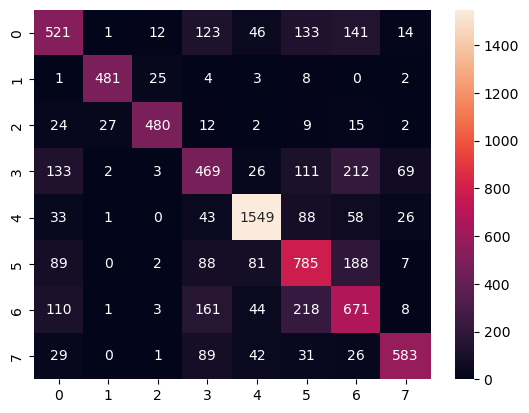

              precision    recall  f1-score   support

       ANGER       0.55      0.53      0.54       991
    CONTEMPT       0.94      0.92      0.93       524
     DISGUST       0.91      0.84      0.88       571
        FEAR       0.47      0.46      0.47      1025
   HAPPINESS       0.86      0.86      0.86      1798
     NEUTRAL       0.57      0.63      0.60      1240
     SADNESS       0.51      0.55      0.53      1216
    SURPRISE       0.82      0.73      0.77       801

    accuracy                           0.68      8166
   macro avg       0.71      0.69      0.70      8166
weighted avg       0.68      0.68      0.68      8166

NaiveBayes.pickle


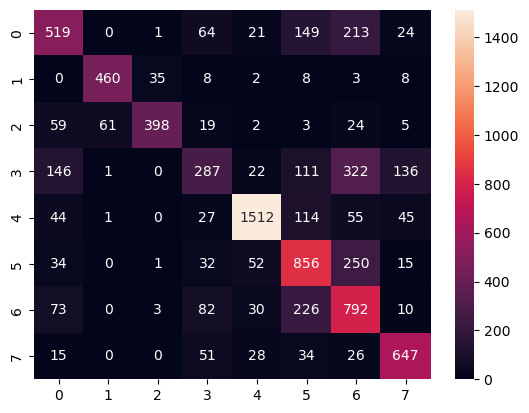

              precision    recall  f1-score   support

       ANGER       0.58      0.52      0.55       991
    CONTEMPT       0.88      0.88      0.88       524
     DISGUST       0.91      0.70      0.79       571
        FEAR       0.50      0.28      0.36      1025
   HAPPINESS       0.91      0.84      0.87      1798
     NEUTRAL       0.57      0.69      0.62      1240
     SADNESS       0.47      0.65      0.55      1216
    SURPRISE       0.73      0.81      0.77       801

    accuracy                           0.67      8166
   macro avg       0.69      0.67      0.67      8166
weighted avg       0.68      0.67      0.67      8166

KNN7.pickle


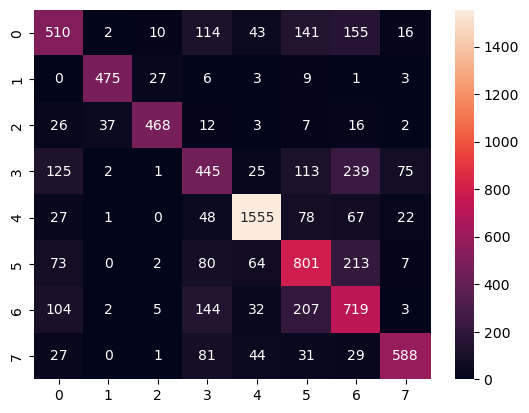

              precision    recall  f1-score   support

       ANGER       0.57      0.51      0.54       991
    CONTEMPT       0.92      0.91      0.91       524
     DISGUST       0.91      0.82      0.86       571
        FEAR       0.48      0.43      0.46      1025
   HAPPINESS       0.88      0.86      0.87      1798
     NEUTRAL       0.58      0.65      0.61      1240
     SADNESS       0.50      0.59      0.54      1216
    SURPRISE       0.82      0.73      0.78       801

    accuracy                           0.68      8166
   macro avg       0.71      0.69      0.70      8166
weighted avg       0.69      0.68      0.68      8166

SVMpoly5.pickle


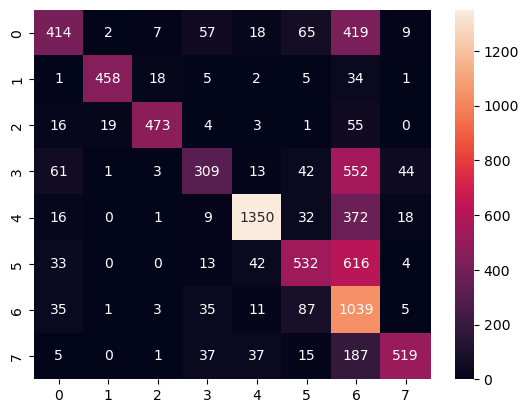

              precision    recall  f1-score   support

       ANGER       0.71      0.42      0.53       991
    CONTEMPT       0.95      0.87      0.91       524
     DISGUST       0.93      0.83      0.88       571
        FEAR       0.66      0.30      0.41      1025
   HAPPINESS       0.91      0.75      0.82      1798
     NEUTRAL       0.68      0.43      0.53      1240
     SADNESS       0.32      0.85      0.46      1216
    SURPRISE       0.86      0.65      0.74       801

    accuracy                           0.62      8166
   macro avg       0.75      0.64      0.66      8166
weighted avg       0.73      0.62      0.64      8166

LogisticRegression.pickle


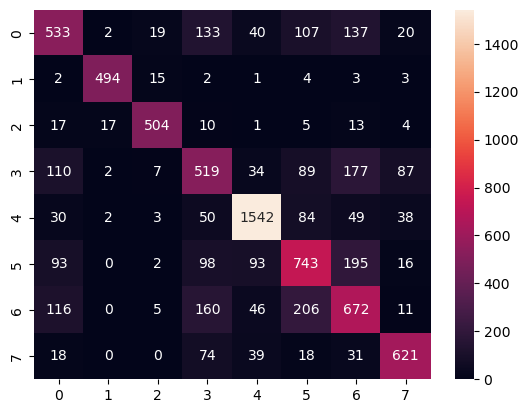

              precision    recall  f1-score   support

       ANGER       0.58      0.54      0.56       991
    CONTEMPT       0.96      0.94      0.95       524
     DISGUST       0.91      0.88      0.90       571
        FEAR       0.50      0.51      0.50      1025
   HAPPINESS       0.86      0.86      0.86      1798
     NEUTRAL       0.59      0.60      0.60      1240
     SADNESS       0.53      0.55      0.54      1216
    SURPRISE       0.78      0.78      0.78       801

    accuracy                           0.69      8166
   macro avg       0.71      0.71      0.71      8166
weighted avg       0.69      0.69      0.69      8166

SVMpoly2.pickle


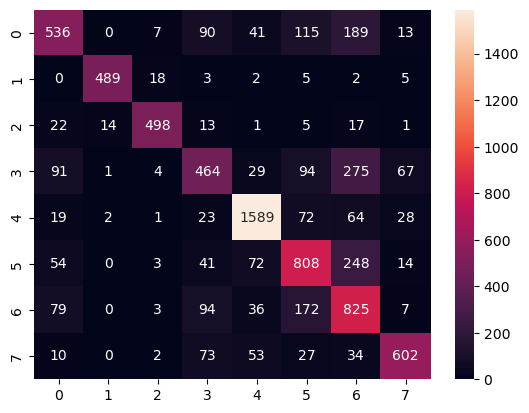

              precision    recall  f1-score   support

       ANGER       0.66      0.54      0.59       991
    CONTEMPT       0.97      0.93      0.95       524
     DISGUST       0.93      0.87      0.90       571
        FEAR       0.58      0.45      0.51      1025
   HAPPINESS       0.87      0.88      0.88      1798
     NEUTRAL       0.62      0.65      0.64      1240
     SADNESS       0.50      0.68      0.57      1216
    SURPRISE       0.82      0.75      0.78       801

    accuracy                           0.71      8166
   macro avg       0.74      0.72      0.73      8166
weighted avg       0.72      0.71      0.71      8166

KNN3.pickle


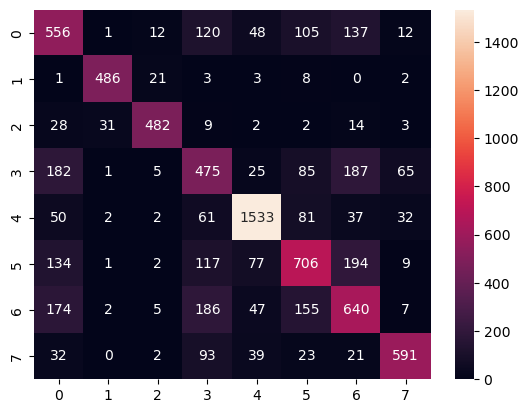

              precision    recall  f1-score   support

       ANGER       0.48      0.56      0.52       991
    CONTEMPT       0.93      0.93      0.93       524
     DISGUST       0.91      0.84      0.87       571
        FEAR       0.45      0.46      0.45      1025
   HAPPINESS       0.86      0.85      0.86      1798
     NEUTRAL       0.61      0.57      0.59      1240
     SADNESS       0.52      0.53      0.52      1216
    SURPRISE       0.82      0.74      0.78       801

    accuracy                           0.67      8166
   macro avg       0.70      0.69      0.69      8166
weighted avg       0.68      0.67      0.67      8166

SVMpoly3.pickle


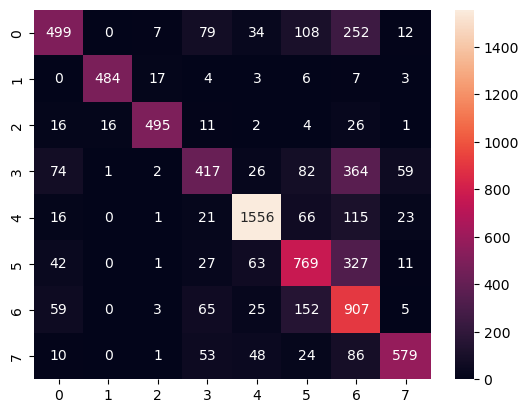

              precision    recall  f1-score   support

       ANGER       0.70      0.50      0.58       991
    CONTEMPT       0.97      0.92      0.94       524
     DISGUST       0.94      0.87      0.90       571
        FEAR       0.62      0.41      0.49      1025
   HAPPINESS       0.89      0.87      0.88      1798
     NEUTRAL       0.64      0.62      0.63      1240
     SADNESS       0.44      0.75      0.55      1216
    SURPRISE       0.84      0.72      0.78       801

    accuracy                           0.70      8166
   macro avg       0.75      0.71      0.72      8166
weighted avg       0.73      0.70      0.70      8166

SVMlinear.pickle


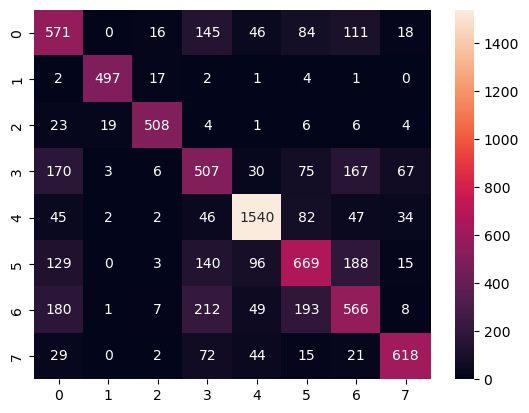

              precision    recall  f1-score   support

       ANGER       0.50      0.58      0.53       991
    CONTEMPT       0.95      0.95      0.95       524
     DISGUST       0.91      0.89      0.90       571
        FEAR       0.45      0.49      0.47      1025
   HAPPINESS       0.85      0.86      0.85      1798
     NEUTRAL       0.59      0.54      0.57      1240
     SADNESS       0.51      0.47      0.49      1216
    SURPRISE       0.81      0.77      0.79       801

    accuracy                           0.67      8166
   macro avg       0.70      0.69      0.69      8166
weighted avg       0.67      0.67      0.67      8166

KNN4.pickle


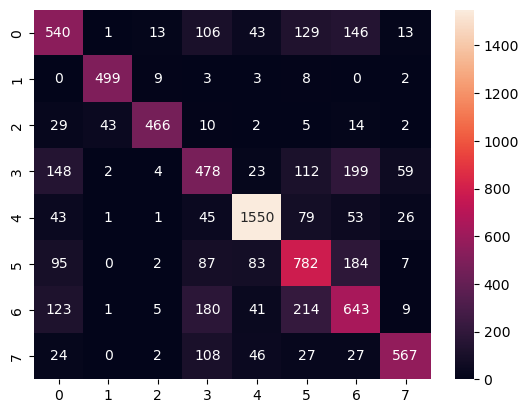

              precision    recall  f1-score   support

       ANGER       0.54      0.54      0.54       991
    CONTEMPT       0.91      0.95      0.93       524
     DISGUST       0.93      0.82      0.87       571
        FEAR       0.47      0.47      0.47      1025
   HAPPINESS       0.87      0.86      0.86      1798
     NEUTRAL       0.58      0.63      0.60      1240
     SADNESS       0.51      0.53      0.52      1216
    SURPRISE       0.83      0.71      0.76       801

    accuracy                           0.68      8166
   macro avg       0.70      0.69      0.69      8166
weighted avg       0.68      0.68      0.68      8166

KNN1.pickle


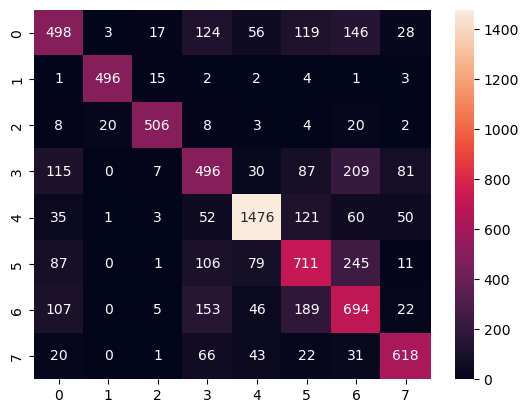

              precision    recall  f1-score   support

       ANGER       0.57      0.50      0.53       991
    CONTEMPT       0.95      0.95      0.95       524
     DISGUST       0.91      0.89      0.90       571
        FEAR       0.49      0.48      0.49      1025
   HAPPINESS       0.85      0.82      0.84      1798
     NEUTRAL       0.57      0.57      0.57      1240
     SADNESS       0.49      0.57      0.53      1216
    SURPRISE       0.76      0.77      0.76       801

    accuracy                           0.67      8166
   macro avg       0.70      0.69      0.70      8166
weighted avg       0.68      0.67      0.67      8166

SVMpoly4.pickle


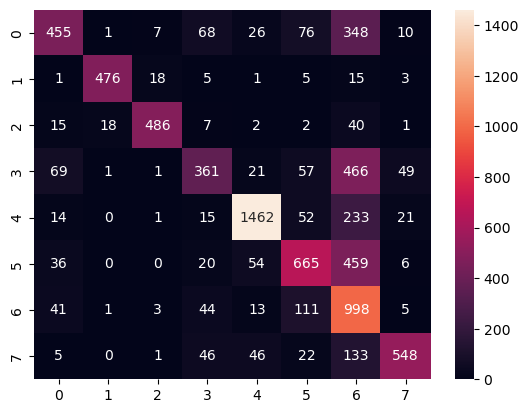

              precision    recall  f1-score   support

       ANGER       0.72      0.46      0.56       991
    CONTEMPT       0.96      0.91      0.93       524
     DISGUST       0.94      0.85      0.89       571
        FEAR       0.64      0.35      0.45      1025
   HAPPINESS       0.90      0.81      0.85      1798
     NEUTRAL       0.67      0.54      0.60      1240
     SADNESS       0.37      0.82      0.51      1216
    SURPRISE       0.85      0.68      0.76       801

    accuracy                           0.67      8166
   macro avg       0.76      0.68      0.69      8166
weighted avg       0.73      0.67      0.68      8166

RandomForest.pickle


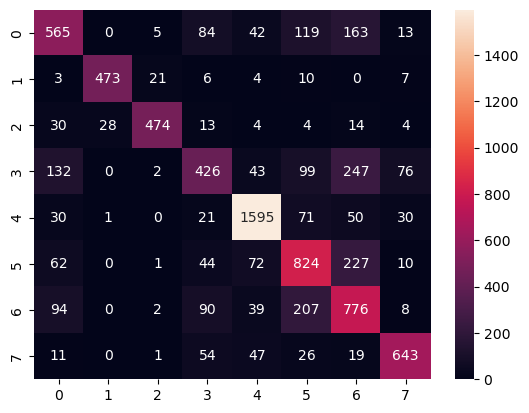

              precision    recall  f1-score   support

       ANGER       0.61      0.57      0.59       991
    CONTEMPT       0.94      0.90      0.92       524
     DISGUST       0.94      0.83      0.88       571
        FEAR       0.58      0.42      0.48      1025
   HAPPINESS       0.86      0.89      0.88      1798
     NEUTRAL       0.61      0.66      0.63      1240
     SADNESS       0.52      0.64      0.57      1216
    SURPRISE       0.81      0.80      0.81       801

    accuracy                           0.71      8166
   macro avg       0.73      0.71      0.72      8166
weighted avg       0.71      0.71      0.71      8166

KNN6.pickle


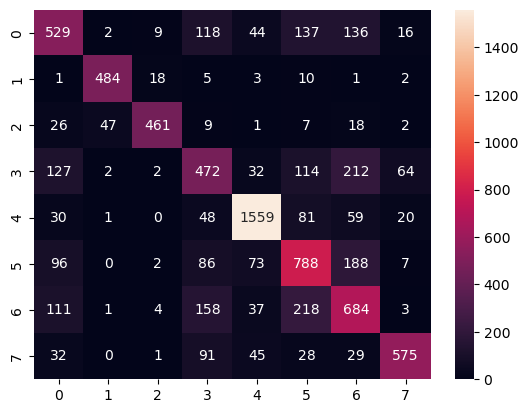

              precision    recall  f1-score   support

       ANGER       0.56      0.53      0.54       991
    CONTEMPT       0.90      0.92      0.91       524
     DISGUST       0.93      0.81      0.86       571
        FEAR       0.48      0.46      0.47      1025
   HAPPINESS       0.87      0.87      0.87      1798
     NEUTRAL       0.57      0.64      0.60      1240
     SADNESS       0.52      0.56      0.54      1216
    SURPRISE       0.83      0.72      0.77       801

    accuracy                           0.68      8166
   macro avg       0.71      0.69      0.70      8166
weighted avg       0.69      0.68      0.68      8166

KNN8.pickle


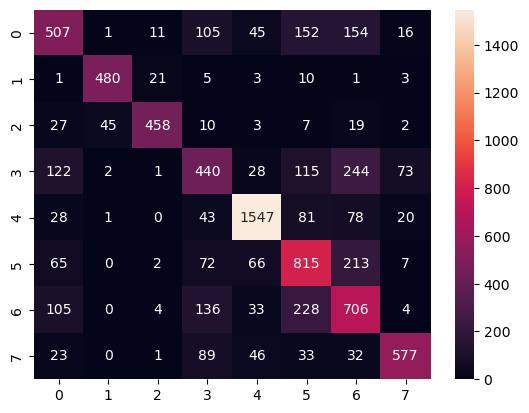

              precision    recall  f1-score   support

       ANGER       0.58      0.51      0.54       991
    CONTEMPT       0.91      0.92      0.91       524
     DISGUST       0.92      0.80      0.86       571
        FEAR       0.49      0.43      0.46      1025
   HAPPINESS       0.87      0.86      0.87      1798
     NEUTRAL       0.57      0.66      0.61      1240
     SADNESS       0.49      0.58      0.53      1216
    SURPRISE       0.82      0.72      0.77       801

    accuracy                           0.68      8166
   macro avg       0.71      0.68      0.69      8166
weighted avg       0.69      0.68      0.68      8166

KNN9.pickle


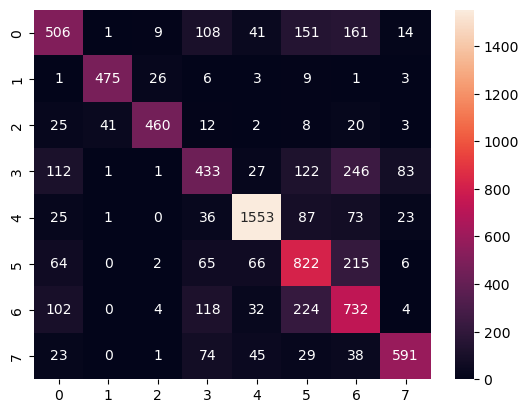

              precision    recall  f1-score   support

       ANGER       0.59      0.51      0.55       991
    CONTEMPT       0.92      0.91      0.91       524
     DISGUST       0.91      0.81      0.86       571
        FEAR       0.51      0.42      0.46      1025
   HAPPINESS       0.88      0.86      0.87      1798
     NEUTRAL       0.57      0.66      0.61      1240
     SADNESS       0.49      0.60      0.54      1216
    SURPRISE       0.81      0.74      0.77       801

    accuracy                           0.68      8166
   macro avg       0.71      0.69      0.70      8166
weighted avg       0.69      0.68      0.68      8166

SVMrbf.pickle


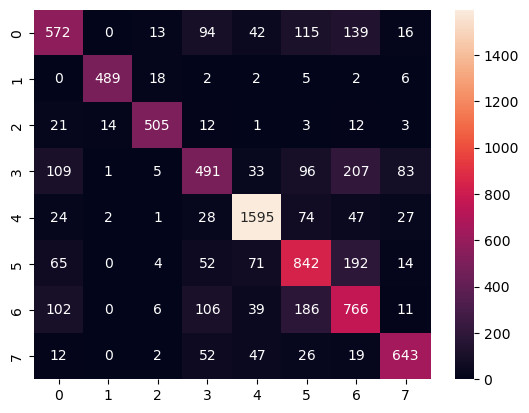

              precision    recall  f1-score   support

       ANGER       0.63      0.58      0.60       991
    CONTEMPT       0.97      0.93      0.95       524
     DISGUST       0.91      0.88      0.90       571
        FEAR       0.59      0.48      0.53      1025
   HAPPINESS       0.87      0.89      0.88      1798
     NEUTRAL       0.63      0.68      0.65      1240
     SADNESS       0.55      0.63      0.59      1216
    SURPRISE       0.80      0.80      0.80       801

    accuracy                           0.72      8166
   macro avg       0.74      0.73      0.74      8166
weighted avg       0.72      0.72      0.72      8166

KNN2.pickle


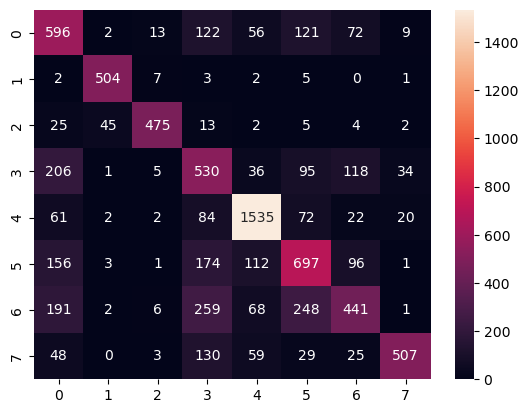

              precision    recall  f1-score   support

       ANGER       0.46      0.60      0.52       991
    CONTEMPT       0.90      0.96      0.93       524
     DISGUST       0.93      0.83      0.88       571
        FEAR       0.40      0.52      0.45      1025
   HAPPINESS       0.82      0.85      0.84      1798
     NEUTRAL       0.55      0.56      0.55      1240
     SADNESS       0.57      0.36      0.44      1216
    SURPRISE       0.88      0.63      0.74       801

    accuracy                           0.65      8166
   macro avg       0.69      0.67      0.67      8166
weighted avg       0.66      0.65      0.65      8166



In [47]:
#for each model inside the models folder, load it and compute the confusion matrix
import os
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.metrics import confusion_matrix


for filename in os.listdir("./models"):
    if filename.endswith(".pickle"):
        print(filename)
        model = pickle.load(open("./models/" + filename, "rb"))
        pred = model.predict(val_x)
        cm = confusion_matrix(val_y, pred)
        
        sn.heatmap(cm, annot=True, fmt='d')
        plt.show()

        print(sklearn.metrics.classification_report(val_y, pred))
        
